In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimpy import clean_columns
from sklearn import linear_model

In [2]:
df = pd.read_csv("LakeData.csv", low_memory = False)
df = clean_columns(df)
df = df.dropna(subset=['mc_ppb'])
df = df.drop(['site_type', 'pw', 'w', 'epi_hypo','mc_id',
              'ac_id', 'notes', 'unnamed_50', 'unnamed_51'], axis=1)
df.head()

52 column names have been cleaned

,lake_name,id_#,date,time,total_depth_m,secchi_depth,depth_m,water_temp_cel_s,do_%_sat,do_mg_l,...,tkn,tn,cond,ss,f,quanta_#,weather_meter_#,fluorometer_#,aquafluor_#,van_dorn_#
1,Beaver Dam,18190BEA2,7/9/2018,15:00,18.0,3.0,0.0,28.83,115.0,8.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Beaver Dam,18204BEA2,7/23/2018,15:15,19.0,5.8,0.0,25.21,88.7,7.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Beaver Dam,18211BEA2,7/31/2018,15:00,18.6,4.4,0.0,25.10,103.3,8.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Beaver Dam,18218BEA2,8/6/2018,14:45,18.8,4.4,0.0,28.77,120.2,9.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Beaver Dam,20153BEA2,6/1/2020,15:00,19.2,1.6,0.0,22.40,160.1,13.83,...,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN


In [3]:
', '.join(list(df.columns))

'lake_name, id_#, date, time, total_depth_m, secchi_depth, depth_m, water_temp_cel_s, do_%_sat, do_mg_l, p_h, con_m_s_cm, nutrient_id, layer, at_c, bar_p_mbar, alt_m, max_ws_m_h, avg_ws_m_h, wind_direction, chloro_1_fluorosense, chloro_2_fluorosense, phyco_1_fluorosense, phyco_2_fluorosense, mc_ppb, nh_3, cl, so_4, no_2, no_3, si_o_2, srp, tp, tkn, tn, cond, ss, f, quanta_#, weather_meter_#, fluorometer_#, aquafluor_#, van_dorn_#'

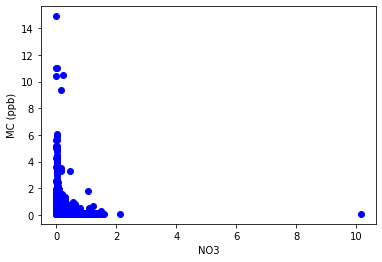

In [4]:
plt.scatter(df.no_3, df.mc_ppb,  color='blue')
plt.xlabel("NO3")
plt.ylabel("MC (ppb)")
plt.show()

Note to self - in the cells below I dropped rows that are NA for N03 in order to create a model.

In [9]:
df = df.dropna(subset=['no_3'])
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [10]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['no_3']])
train_y = np.asanyarray(train[['mc_ppb']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.20661596]]
Intercept:  [0.53456029]


Text(0, 0.5, 'MC (ppb)')

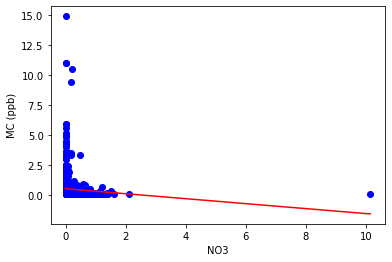

In [12]:
plt.scatter(train.no_3, train.mc_ppb,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("NO3")
plt.ylabel("MC (ppb)")